# Loss graphs

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
data = {
    "10e_5b":[1.0583897479649247,1.031374625090895,1.005254399159859,0.7999650363264412,0.5812150810299248,0.4888720928594984,0.4471681724334585,0.42559651413868216,0.41039945493484364,0.3993139210446128],
    "10e_10b": [1.065488548114382,1.0513073740334347,1.0378052695044155,1.0250027015291412,1.012850338015063,1.001270436007401,0.989885872807996,0.9396206654351333,0.7485620112254702,0.6277867288425051],
    "10e_15b": [1.067736518383026,1.0578282535076142,1.0482106924057006,1.0389345347881318,1.02999467253685,1.021369957923889,1.0130434691905976,1.0049876391887664,0.9970778554677964,0.986726176738739],
    "20e_5b": [1.0583781805531731,1.0313885294157883,1.0070344651567524,0.9343221557551417,0.6394455525381811,0.4974281320284153,0.4471194625928484,0.4218492615839531,0.41315215928801174, 0.39786831058304883, 0.38814184583466627, 0.37443850472055634, 0.36509685166950884, 0.35732629278610495, 0.3513682083836917, 0.3419564397170626, 0.33810408875860015, 0.32903146178557957, 0.32223265232711, 0.31719279751695434],
    "20e_10b":[1.065442447004647,1.051255279573901,1.0377467418539112,1.024925975963987,1.0126380139383777,0.989145118614723,0.7996241655843012,0.6643673613153654,0.5687515324559705,0.5128008024445896,0.48069775104522705,0.458613790314773,0.443168036896607,0.4356962627378003,0.42406211125439613,0.4156442829247179,0.40682594632280283,0.40010031338395746,0.3937886254540805,0.3882761176290183],
    "20e_15b": [1.067704790830612,1.0578000009059907,1.0481832206249238,1.038906639814377,1.029964768886566,1.0213430225849152,1.013026213659351,1.004980170726776,0.9971498310565948,0.9888723939657211,0.9587590098381042,0.8319007366895675,0.7210770308971405,0.615899375677109,0.5511270493268967,0.51301159709692,0.4802417665719986,0.4584363713860512,0.4443813875317574,0.4344960987567902],
    "50e_5b": [1.0583922390280098,1.0313975276618168,1.0070199945877338,0.9193295137635593,0.6220453576794986,0.5043727041318499,0.4526519523612384,0.425703014279234,0.40752663540429085,0.3994028465501193,0.3844290154761282,0.3767311418878621,0.3655867386480858,0.3580221168953797,0.3513402450701286,0.34294856005701524,0.337174568710656,0.33211770088508213,0.32857659921563903,0.32132915278960916,0.3162943047696146,0.31131490653958815,0.31157492615025617,0.30315492327870996,0.2986659988247115,0.29488132791272526,0.2919270830421612,0.2890484148058398,0.2851378994769064,0.2817265812692971,0.2792523981168352,0.2763630151748657,0.27552195766876486,0.2720947394083286,0.26789849508425284,0.26619937527796317,0.26328732304531954,0.26051382206637286,0.25916600998105677,0.25634401959591896,0.2556862175978463,0.25274308565361747,0.25181267821583253,0.24918614148065962,0.24903368975581794,0.24883334826806497,0.24578899710342803,0.24294945109507132,0.23934123022802944,0.23797127655867872],
    "50e_10b": [1.0654865791057717,1.0513075713453621,1.0378061327440986,1.0250043416845387,1.0128478017346612,1.0012396368487129,0.9875847347851457,0.8766343079764267,0.7195422896023455,0.5939503168237621,0.5318524015360865,0.49061589816520956,0.4644766480758272,0.44761788639529,0.44090484339615393,0.4235210017911319,0.4131985255356493,0.4034127202527276,0.3974330096409239,0.38925857687818594,0.38451583118274296,0.37870613357116434,0.3730158405057315,0.3650843747730913,0.36166372792474155,0.35621555612005035,0.3507070438615207,0.3465159165448156,0.34148527424910974,0.34045339041742784,0.3342781354641092,0.32941586395789835,0.3260952778931322,0.324098473992841,0.3199303448200226,0.31697240574606533,0.3154726583382179,0.31026244060746555,0.312241288094685,0.30501494736507023,0.3014954636836874,0.2991046843857601,0.2971583892559183,0.29773487715885555,0.29387165760171824,0.2902320993357691,0.2875093016131171,0.2843812498553046,0.2827134975071611,0.2808539682421191],
    "50e_15b": [1.067712026834488,1.0578084468841553,1.0481920540332794,1.0389142036437988,1.0299765348434449,1.0213545501232146,1.0130404472351073,1.0050029814243318,0.9972284138202667,0.9896223604679107,0.9817780703306198,0.9655471473932267,0.8254435956478119,0.676055321097374,0.5844222724437713,0.5223482847213745,0.49550645500421525,0.46929042637348173,0.4512255981564522,0.4360801801085472,0.42787840962409973,0.41824303567409515,0.4124374479055405,0.40681799650192263,0.4000079795718193,0.39594831466674807,0.387858609855175,0.38349666595458987,0.3806920975446701,0.3767114728689194,0.37058375775814056,0.3682970225811005,0.3689557760953903,0.3597990870475769,0.35729742497205735,0.35284264385700226,0.3507369667291641,0.34661235213279723,0.34699914157390593,0.34251853078603745,0.3380250185728073,0.33429495692253114,0.33280346393585203,0.3321495816111565,0.32733064591884614,0.3282501041889191,0.3246601715683937,0.3194034457206726,0.3161609947681427,0.31417274177074433],
    "100e_5b": [1.058413515830862,1.0314161695283035,1.0070433339168285,0.9166212410762392,0.648741130171151,0.5121319129549223,0.4638369391704428,0.43611945263270674,0.42100981648626,0.4043335102755448,0.3923250277494562,0.38081717028700074,0.37072103033805714,0.36247529962967184,0.35472714078837425,0.3479825232563348,0.34344708302925375,0.33663699339176045,0.32819374522258493,0.3216599339041217,0.31748065403823195,0.31311715625483416,0.3066167975294179,0.30367207989610473,0.2989743357074672,0.29501296888137685,0.2903150648906313,0.28989837447117117,0.2842173347699231,0.2814870564074352,0.27918610490601636,0.2762266492535328,0.2730567863789098,0.2715133585292718,0.2665795239395109,0.26835393828564674,0.2653925822212778,0.2608307957135398,0.25810074652063436,0.2548266140551403,0.25395789485553216,0.25770629454275656,0.25264703790689336,0.250786398762259,0.24789193683657154,0.24658103235836687,0.24316685184322553,0.24241786321689343,0.23922288135207934,0.2388631629532781,0.23676013689616632,0.23471977099262434,0.23385123754369802,0.2337816421841753,0.22897416558758965,0.22827559606782322,0.2278119544016904,0.22672760383836155,0.22464618343731452,0.2243649124585349,0.2213978736565031,0.22002765561999946,0.21873145756022683,0.21869373398608175,0.21637246809129057,0.21601905827892237,0.21507463604211807,0.21304671928800387,0.21297404683869461,0.2107103122719403,0.21304972341348385,0.20993756708400002,0.20827548154469194,0.207832182789671,0.20565956753903422,0.20434383354310331,0.20278375570116372,0.2027332536105452,0.20183974710004082,0.20499290371763296,0.19966885575960422,0.19811262704175095,0.19692166355149499,0.19609126936772775,0.19493310256250973,0.19432083414546375,0.19442203152796317,0.1929412450769852,0.192618272941688,0.19068433344364166,0.19065283136121158,0.188700661833944,0.18878250748946748,0.1880208713741138,0.1866995209249957,0.18621017604038634,0.18510874155266532,0.18610496305186172,0.18318122599659295,0.18252459913492203],
    "100e_10b": [1.0654619932174683,1.0512836061674973,1.037783039027247,1.0249843145238942,1.0128360041256608,1.0012695357717316,0.9898958082856804,0.937666523045507,0.7624671315324718,0.6443583430915043,0.5615422129631042,0.5077544204119978,0.4684290228218868,0.4462518270673423,0.43031738852632456,0.4181983100956884,0.40918644851651687,0.3995105603645588,0.3912202787810358,0.3849631003264723,0.3784305812983677,0.37535250186920166,0.3686598909312281,0.3625404094827586,0.3559145927429199,0.35280334332893637,0.347445423233098,0.34302239274156504,0.3395066775124648,0.3348816746267779,0.331238624350778,0.32729012185129625,0.32515417501844207,0.3200687663308505,0.31769824028015137,0.317762880489744,0.3127809166908264,0.30838225113934487,0.30548784753371927,0.30247798664816494,0.2997922917892193,0.2972953350379549,0.2938929426259008,0.2931395399159399,0.2950184314415373,0.28861297101810063,0.2856762183123621,0.2837233265926098,0.2813369056274151,0.2791125661340253,0.27777967884622773,0.27507786452770233,0.2736220298142269,0.27281736197142764,0.27371595645773,0.269841098066034,0.26928896328498575,0.26871345320652273,0.2652622086220774,0.26248864367090424,0.2607271635326846,0.26009148359298706,0.2579063768016881,0.2580296068355955,0.2551672777225231,0.25269778535283843,0.25151948168359956,0.25104830645281695,0.24948338393507333,0.24739082260378475,0.2489921990139731,0.24473816824370417,0.24365027146092777,0.2436168923460204,0.24611772494069462,0.2419812561109148,0.2399495475251099,0.23778841567450557,0.2372379482820116,0.23714899194651637,0.23672901761942897,0.23293993082539788,0.23213702954094986,0.23157885516511983,0.23101390538544492,0.23156789099348002,0.22967095724467573,0.2303886922269032,0.2273303111051691,0.2301951420718226,0.22432801949566808,0.22385718339476093,0.2227710048700201,0.22185584080630336,0.22154801981202488,0.22057878765566596,0.22022432243001872,0.21919420412902174,0.2192794151347259,0.21768202555590663],
    "100e_15b": [1.0677102327346801,1.0578000128269196,1.0481797218322755,1.038900500535965,1.0299571752548218,1.0213264524936676,1.0129991054534913,1.0049218237400055,0.9968687176704407,0.9825470745563507,0.8585065931081772,0.7402216851711273,0.6711445361375808,0.6012967675924301,0.5520347058773041,0.5116151720285416,0.4853838384151459,0.4671629652380943,0.44916907995939254,0.4387060210108757,0.43795842826366427,0.4184291109442711,0.41445461958646773,0.4073556736111641,0.4046620950102806,0.3945461675524712,0.39127287417650225,0.38576412945985794,0.38552576303482056,0.3765499085187912,0.37234286665916444,0.3679820567369461,0.3646934226155281,0.364566271007061,0.35840723365545274,0.3555576831102371,0.3545366331934929,0.3520987585186958,0.3448701173067093,0.34145416915416715,0.337756285071373,0.335180202126503,0.3320207461714745,0.32974163591861727,0.3273430928587914,0.3241453155875206,0.32358782440423967,0.32273499518632887,0.3190234497189522,0.31406032741069795,0.31327923834323884,0.3152425721287727,0.31278683841228483,0.3063176736235619,0.3061553865671158,0.3045659691095352,0.3022830352187157,0.30290597230196,0.29779002964496615,0.29616096764802935,0.29553032517433164,0.2917528092861176,0.2904952377080917,0.295092336833477,0.28759931325912474,0.285740053653717,0.28465206772089,0.2827396884560585,0.28358389586210253,0.28258336782455445,0.27967391163110733,0.27635064721107483,0.2756194189190865,0.27575327157974244,0.27674228250980376,0.274762399494648,0.2701409861445427,0.2678040452301502,0.26822867095470426,0.2660659119486809,0.26629619151353834,0.2658656299114227,0.2634067013859749,0.263014928996563,0.25924053564667704,0.2599311649799347,0.25682663843035697,0.25686379298567774,0.25532027035951615,0.25660278648138046,0.25500296205282214,0.25505860075354575,0.25201977640390394,0.25004475861787795,0.2507792145013809,0.2514901451766491,0.2494038611650467,0.24691906571388245,0.24553922787308693,0.24462512359023095]
}

## 10 epochs plot

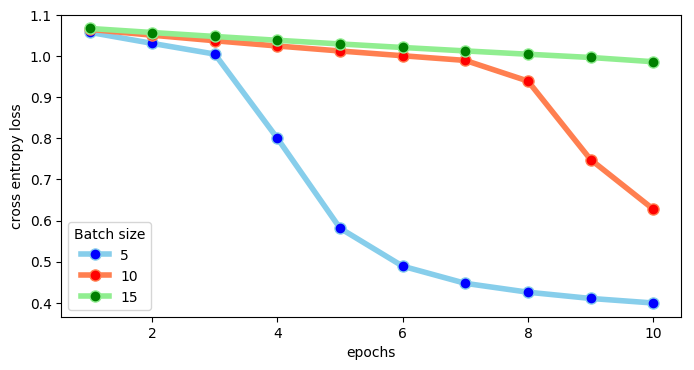

In [16]:
df=pd.DataFrame({
    'epochs': range(1,len(data["10e_5b"])+1), 
    '10e_5b': data["10e_5b"], 
    '10e_10b': data["10e_10b"], 
    '10e_15b': data["10e_15b"] })

fig = plt.figure(figsize=(8, 4), dpi=100)
# multiple line plot
#plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.plot('epochs', '10e_5b', data=df, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.plot('epochs', '10e_10b', data=df, marker='o', markerfacecolor='red', markersize=8, color='coral', linewidth=4)
plt.plot('epochs', '10e_15b', data=df, marker='o', markerfacecolor='green', markersize=8, color='lightgreen', linewidth=4)
plt.xlabel("epochs")
plt.ylabel("cross entropy loss")
plt.legend(("5", "10", "15"),title = "Batch size")
plt.show()
fig.savefig('readme_plots/10epochs_plot.png')

## 20 epochs plot

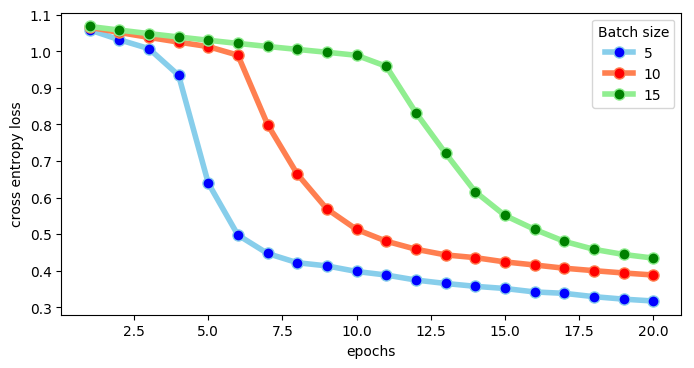

In [21]:
df=pd.DataFrame({
    'epochs': range(1,len(data["20e_5b"])+1), 
    '20e_5b': data["20e_5b"], 
    '20e_10b': data["20e_10b"], 
    '20e_15b': data["20e_15b"] })

fig = plt.figure(figsize=(8, 4), dpi=100)
plt.plot('epochs', '20e_5b', data=df, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.plot('epochs', '20e_10b', data=df, marker='o', markerfacecolor='red', markersize=8, color='coral', linewidth=4)
plt.plot('epochs', '20e_15b', data=df, marker='o', markerfacecolor='green', markersize=8, color='lightgreen', linewidth=4)
plt.xlabel("epochs")
plt.ylabel("cross entropy loss")
plt.legend(("5", "10", "15"),title = "Batch size")
plt.show()
fig.savefig('readme_plots/20epochs_plot.png')

## 50 epochs plot

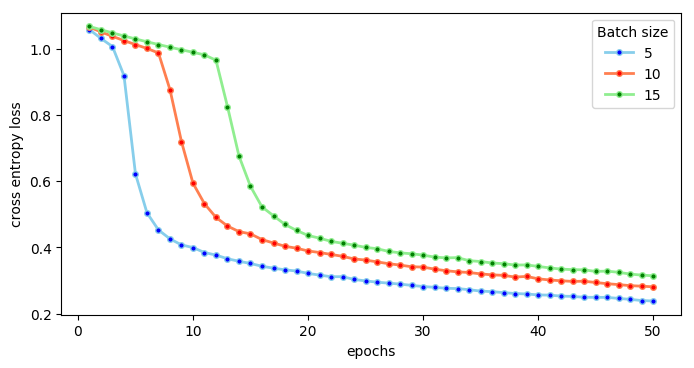

In [22]:
df=pd.DataFrame({
    'epochs': range(1,len(data["50e_5b"])+1), 
    '50e_5b': data["50e_5b"], 
    '50e_10b': data["50e_10b"], 
    '50e_15b': data["50e_15b"] })

fig = plt.figure(figsize=(8, 4), dpi=100)
plt.plot('epochs', '50e_5b', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=2)
plt.plot('epochs', '50e_10b', data=df, marker='o', markerfacecolor='red', markersize=4, color='coral', linewidth=2)
plt.plot('epochs', '50e_15b', data=df, marker='o', markerfacecolor='green', markersize=4, color='lightgreen', linewidth=2)
plt.xlabel("epochs")
plt.ylabel("cross entropy loss")
plt.legend(("5", "10", "15"),title = "Batch size")
plt.show()
fig.savefig('readme_plots/50epochs_plot.png')

## 100 epochs plot

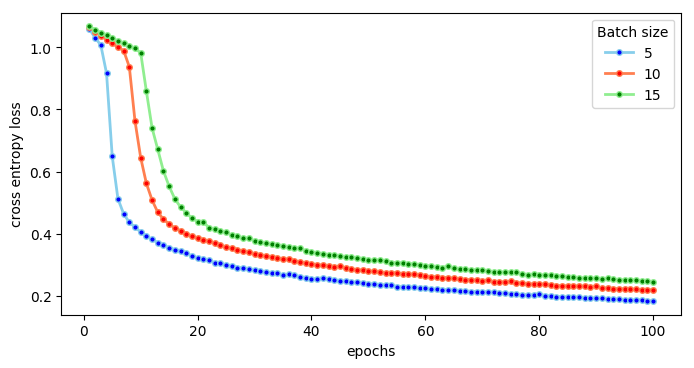

In [24]:
df=pd.DataFrame({
    'epochs': range(1,len(data["100e_5b"])+1), 
    '100e_5b': data["100e_5b"], 
    '100e_10b': data["100e_10b"], 
    '100e_15b': data["100e_15b"] })

fig = plt.figure(figsize=(8, 4), dpi=100)
plt.plot('epochs', '100e_5b', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=2)
plt.plot('epochs', '100e_10b', data=df, marker='o', markerfacecolor='red', markersize=4, color='coral', linewidth=2)
plt.plot('epochs', '100e_15b', data=df, marker='o', markerfacecolor='green', markersize=4, color='lightgreen', linewidth=2)
plt.xlabel("epochs")
plt.ylabel("cross entropy loss")
plt.legend(("5", "10", "15"),title = "Batch size")
plt.show()
fig.savefig('readme_plots/100epochs_plot.png')